In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv(r'C:\Users\begba\Desktop\GOOG.csv')

In [3]:
# Prepare the data
series = data['Close']  # Select the 'Close' price variable for analysis


In [4]:
# Split the data into training and test sets
train_size = int(0.8 * len(series))  # Set the training set size (80% in this example)
train, test = series[:train_size], series[train_size:]

In [5]:
# Define and fit the SARIMA model to the training data
model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))  # Set the model parameters
model_fit = model.fit()

D:\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [6]:
# Perform punctual prediction
forecast = model_fit.get_forecast(steps=len(test))
predicted_mean = forecast.predicted_mean

In [7]:
# Perform confidence interval prediction
confidence_interval = forecast.conf_int(alpha=0.05)  # Set the desired confidence level (e.g., 95% confidence interval)


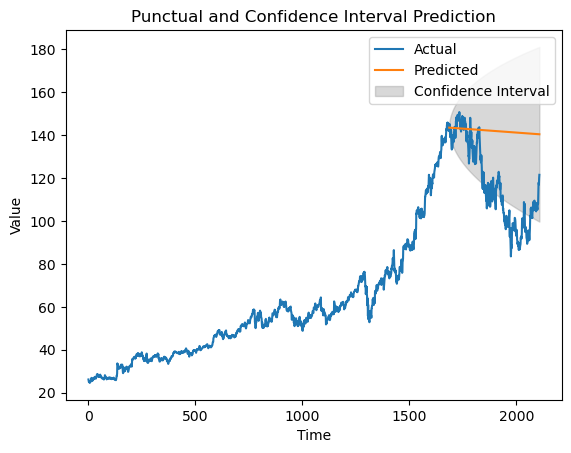

In [9]:
# Plot the actual, predicted, and confidence interval values
plt.plot(series.index, series, label='Actual')
plt.plot(test.index, predicted_mean, label='Predicted')
plt.fill_between(test.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Punctual and Confidence Interval Prediction')
plt.legend()
plt.show()


Cerinta 9 comparare


In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, ARIMA
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
import math


In [22]:
# Split the data into training and test sets
train_size = int(0.8 * len(series))
train, test = series[:train_size], series[train_size:]

In [23]:
# Moving Average
moving_avg_forecast = [train.rolling(window=5).mean().iloc[-1]] * len(test)
moving_avg_rmse = math.sqrt(mean_squared_error(test, moving_avg_forecast))


In [24]:
# Exponential Smoothing
es_model = ExponentialSmoothing(train)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(len(test))
es_rmse = math.sqrt(mean_squared_error(test, es_forecast))

In [31]:
# ARIMA
try:
    arima_model = ARIMA(train, order=(1, 0, 0))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(len(test))[0]
    arima_rmse = math.sqrt(mean_squared_error(test, arima_forecast))
except Exception as e:
    print(f"ARIMA model failed: {str(e)}")
    arima_rmse = None


D:\conda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA model failed: 0


In [32]:
# Print the RMSE for each forecasting method
print(f'Moving Average RMSE: {moving_avg_rmse}')
print(f'Exponential Smoothing RMSE: {es_rmse}')
print(f'ARIMA RMSE: {arima_rmse}')

Moving Average RMSE: 32.995564639781946
Exponential Smoothing RMSE: 32.36293743931335
ARIMA RMSE: None
